In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data/top_crypto.csv', sep=",")
df['Date'] = pd.to_datetime(df['Date'])

#df.drop(index=1, inplace=True)
df.head(3)
df

,Date,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return
0,2020-09-01,11679.316406,12067.081055,11601.128906,11970.478516,11970.478516,27311555343,BTC,NaN
1,2020-09-02,11964.823242,11964.823242,11290.793945,11414.034180,11414.034180,28037405299,BTC,-0.046485
2,2020-09-03,11407.191406,11443.022461,10182.464844,10245.296875,10245.296875,31927261555,BTC,-0.102395
3,2020-09-04,10230.365234,10663.919922,10207.940430,10511.813477,10511.813477,29965130374,BTC,0.026014
4,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,44916565292,BTC,-0.032558
...,...,...,...,...,...,...,...,...,...
20219,2024-02-16,0.889987,0.955351,0.887605,0.952738,0.952738,629406406,MATIC,0.070579
20220,2024-02-17,0.952643,0.958453,0.906262,0.928708,0.928708,424799841,MATIC,-0.025222
20221,2024-02-18,0.928696,0.998964,0.919444,0.998964,0.998964,446422115,MATIC,0.075649
20222,2024-02-19,0.998948,1.009716,0.977216,0.996435,0.996435,538541025,MATIC,-0.002532


In [3]:
# Moving Averages
df['SMA_30'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30).mean())
df['SMA_60'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=60).mean())
df['SMA_90'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=90).mean())

df['EMA_30'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=30, adjust=False).mean())
df['EMA_60'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=60, adjust=False).mean())
df['EMA_90'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=90, adjust=False).mean())

# RSI Calculation
def calculate_rsi(x, periods=14):
    delta = x.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = df.groupby('Symbol')['Close'].transform(calculate_rsi)

# MACD Calculation
df['EMA_12'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df['EMA_26'] = df.groupby('Symbol')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df.groupby('Symbol')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']


In [5]:
import numpy as np
import pandas as pd

df['Midpoint'] = (df['High'] + df['Low']) / 2

# Initialize columns for log returns and annualized volatility
df['Log_Return'] = np.nan
df['Annualized_Volatility'] = np.nan

#  daily log returns and annualized volatility for each symbol
for symbol, group in df.groupby('Symbol'):
    # Calculate log returns for the current group
    df.loc[group.index, 'Log_Return'] = np.log(group['Midpoint'] / group['Midpoint'].shift(1))
    
    # Calculate daily volatility for the current group
    daily_volatility = group['Log_Return'].std()
    
    # Annualize the daily volatility
    annualized_volatility = daily_volatility * np.sqrt(252)
    
    # Assign the annualized volatility to the entire group
    df.loc[group.index, 'Annualized_Volatility'] = annualized_volatility

    # Optionally, print the volatilities for each symbol
    print(f"Symbol: {symbol}")
    print(f"Daily Volatility: {daily_volatility}")
    print(f"Annualized Volatility: {annualized_volatility}\n")


Symbol: ADA
Daily Volatility: nan
Annualized Volatility: nan

Symbol: AVAX
Daily Volatility: nan
Annualized Volatility: nan

Symbol: BCH
Daily Volatility: nan
Annualized Volatility: nan

Symbol: BNB
Daily Volatility: nan
Annualized Volatility: nan

Symbol: BTC
Daily Volatility: nan
Annualized Volatility: nan

Symbol: DOGE
Daily Volatility: nan
Annualized Volatility: nan

Symbol: DOT
Daily Volatility: nan
Annualized Volatility: nan

Symbol: ETH
Daily Volatility: nan
Annualized Volatility: nan

Symbol: LINK
Daily Volatility: nan
Annualized Volatility: nan

Symbol: MATIC
Daily Volatility: nan
Annualized Volatility: nan

Symbol: NEAR
Daily Volatility: nan
Annualized Volatility: nan

Symbol: SOL
Daily Volatility: nan
Annualized Volatility: nan

Symbol: TON
Daily Volatility: nan
Annualized Volatility: nan

Symbol: TRX
Daily Volatility: nan
Annualized Volatility: nan

Symbol: USDT
Daily Volatility: nan
Annualized Volatility: nan

Symbol: XRP
Daily Volatility: nan
Annualized Volatility: nan



#### 30, 60, 90 Moving Average

In [6]:
#  Moving Averages for the Closing Prices of each stock
df['30_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30).mean())
df['60_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=60).mean())
df['90_day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=90).mean())

#### 30-Day Rolling Volatility 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

btc_log_returns = df[df['Symbol'] == 'BTC']['Log_Return']
eth_log_returns = df[df['Symbol'] == 'ETH']['Log_Return']

df.loc[df['Symbol'] == 'BTC', 'BTC_Volatility'] = btc_log_returns.rolling(window=30).std() * np.sqrt(252)
df.loc[df['Symbol'] == 'ETH', 'ETH_Volatility'] = eth_log_returns.rolling(window=30).std() * np.sqrt(252)


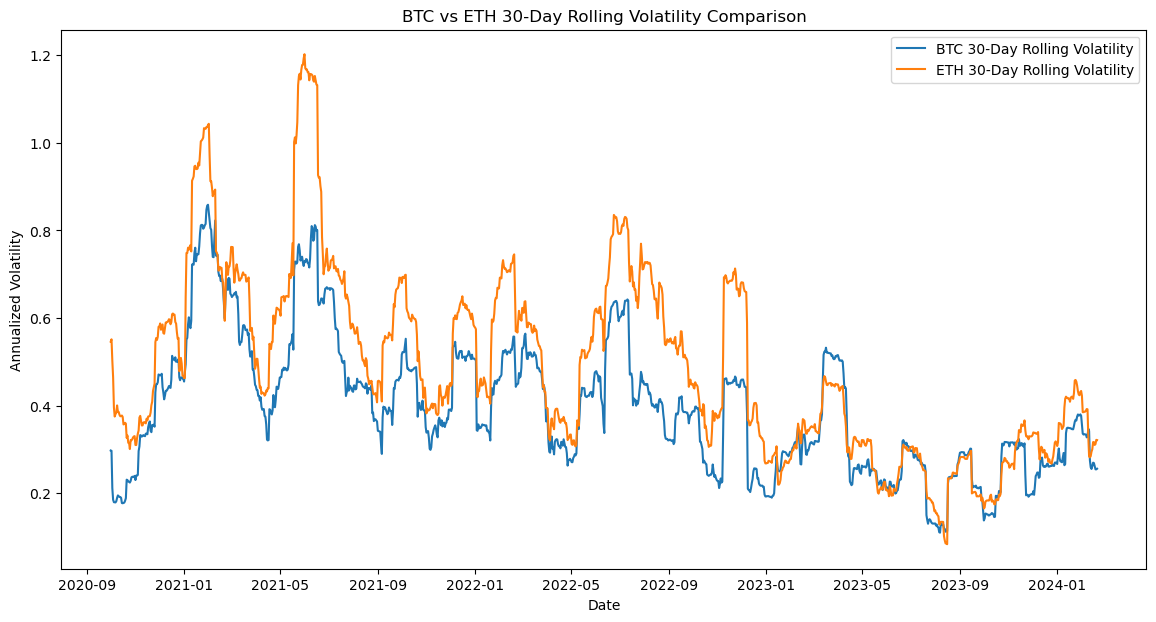

In [8]:
# Pivot the DataFrame to get a date index and separate columns for BTC and ETH volatility
volatility_df = df.pivot_table(index='Date', values=['BTC_Volatility', 'ETH_Volatility'], aggfunc='first')


plt.figure(figsize=(14, 7))
plt.plot(volatility_df['BTC_Volatility'], label='BTC 30-Day Rolling Volatility')
plt.plot(volatility_df['ETH_Volatility'], label='ETH 30-Day Rolling Volatility')
plt.title('BTC vs ETH 30-Day Rolling Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()


In [9]:
df.isnull().sum()


Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume($)                    0
Symbol                       0
Daily Return                16
SMA_30                     464
SMA_60                     944
SMA_90                    1424
EMA_30                       0
EMA_60                       0
EMA_90                       0
RSI                        208
EMA_12                       0
EMA_26                       0
MACD                         0
Signal_Line                  0
MACD_Histogram               0
Midpoint                     0
Log_Return                  16
Annualized_Volatility    20224
30_day_MA                  464
60_day_MA                  944
90_day_MA                 1424
BTC_Volatility           18986
ETH_Volatility           18986
dtype: int64

#### Creating Lag Features

Created by shifting the values of a given feature backwards in time. This process introduces previous time steps of a feature as input for predictions, allowing models to learn from past values to predict future ones. For cryptocurrencies, lag features of prices and volumes can be particularly informative.

In [10]:
# Creating lag features for 'Close' and 'Volume($)'
for lag in [1, 3, 7]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    df[f'Volume_lag_{lag}'] = df['Volume($)'].shift(lag)

# Generating rolling window features for 'Close' and 'Volume($)'
for window in [7, 30]:
    df[f'Close_rolling_mean_{window}'] = df['Close'].rolling(window=window).mean()
    df[f'Close_rolling_std_{window}'] = df['Close'].rolling(window=window).std()
    df[f'Volume_rolling_mean_{window}'] = df['Volume($)'].rolling(window=window).mean()
    df[f'Volume_rolling_std_{window}'] = df['Volume($)'].rolling(window=window).std()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,...,Close_lag_7,Volume_lag_7,Close_rolling_mean_7,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30
0,2020-09-01,11679.316406,12067.081055,11601.128906,11970.478516,11970.478516,27311555343,BTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-02,11964.823242,11964.823242,11290.793945,11414.034180,11414.034180,28037405299,BTC,-0.046485,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-03,11407.191406,11443.022461,10182.464844,10245.296875,10245.296875,31927261555,BTC,-0.102395,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-04,10230.365234,10663.919922,10207.940430,10511.813477,10511.813477,29965130374,BTC,0.026014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-05,10512.530273,10581.571289,9946.675781,10169.567383,10169.567383,44916565292,BTC,-0.032558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.drop(columns=['BTC_Volatility', 'ETH_Volatility','Annualized_Volatility'], inplace=True)

In [12]:
# Drop the initial rows where rolling features cannot be computed (first 30 days due to the longest window)
df = df.dropna()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18800 entries, 89 to 20223
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    18800 non-null  datetime64[ns]
 1   Open                    18800 non-null  float64       
 2   High                    18800 non-null  float64       
 3   Low                     18800 non-null  float64       
 4   Close                   18800 non-null  float64       
 5   Adj Close               18800 non-null  float64       
 6   Volume($)               18800 non-null  int64         
 7   Symbol                  18800 non-null  object        
 8   Daily Return            18800 non-null  float64       
 9   SMA_30                  18800 non-null  float64       
 10  SMA_60                  18800 non-null  float64       
 11  SMA_90                  18800 non-null  float64       
 12  EMA_30                  18800 non-null  float64   

In [14]:
# Filter the dataframe for dates from the start_date to the most recent entry
df = df[df['Date'] >= pd.to_datetime("2021-01-01")]

df

,Date,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,...,Close_lag_7,Volume_lag_7,Close_rolling_mean_7,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30
122,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,0.012842,22428.243750,...,24664.791016,4.206840e+10,27767.629185,1284.059118,4.970113e+10,8.115395e+09,22428.243750,3661.566866,3.886562e+10,1.223869e+10
123,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,BTC,0.093726,22850.972721,...,26437.037109,4.833265e+10,28580.519252,1936.633106,5.249153e+10,1.055716e+10,22850.972721,4019.854985,4.006346e+10,1.325301e+10
124,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,0.020380,23320.381315,...,26272.294922,6.647990e+10,29510.480469,2189.909798,5.423229e+10,1.376529e+10,23320.381315,4328.735995,4.155655e+10,1.494648e+10
125,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,-0.024712,23747.637435,...,27084.808594,4.905674e+10,30208.638393,2063.049095,5.881897e+10,1.677368e+10,23747.637435,4531.181152,4.335392e+10,1.634268e+10
126,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,0.063197,24235.881055,...,27362.437500,4.526595e+10,31155.780134,2060.489590,6.200202e+10,1.586251e+10,24235.881055,4820.354256,4.476237e+10,1.655196e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20219,2024-02-16,0.889987,0.955351,0.887605,0.952738,0.952738,629406406,MATIC,0.070579,0.807180,...,0.853058,3.262608e+08,0.878875,0.039070,3.734551e+08,1.287179e+08,0.807180,0.052237,3.199652e+08,9.936803e+07
20220,2024-02-17,0.952643,0.958453,0.906262,0.928708,0.928708,424799841,MATIC,-0.025222,0.811980,...,0.848925,2.616304e+08,0.890272,0.040488,3.967651e+08,1.195393e+08,0.811980,0.056539,3.212611e+08,1.005049e+08
20221,2024-02-18,0.928696,0.998964,0.919444,0.998964,0.998964,446422115,MATIC,0.075649,0.819912,...,0.834954,2.377490e+08,0.913702,0.049576,4.265755e+08,9.720848e+07,0.819912,0.065174,3.199476e+08,9.851786e+07
20222,2024-02-19,0.998948,1.009716,0.977216,0.996435,0.996435,538541025,MATIC,-0.002532,0.826956,...,0.881026,3.677870e+08,0.930189,0.055709,4.509689e+08,1.013343e+08,0.826956,0.072312,3.276565e+08,1.062377e+08


In [15]:
# Convert the Date column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)


In [118]:
df

,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
122,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC,0.012842,22428.243750,19715.608773,...,1284.059118,4.970113e+10,8.115395e+09,22428.243750,3661.566866,3.886562e+10,1.223869e+10,2021,1,1
123,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,BTC,0.093726,22850.972721,20018.558219,...,1936.633106,5.249153e+10,1.055716e+10,22850.972721,4019.854985,4.006346e+10,1.325301e+10,2021,1,2
124,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC,0.020380,23320.381315,20329.363493,...,2189.909798,5.423229e+10,1.376529e+10,23320.381315,4328.735995,4.155655e+10,1.494648e+10,2021,1,3
125,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC,-0.024712,23747.637435,20602.564583,...,2063.049095,5.881897e+10,1.677368e+10,23747.637435,4531.181152,4.335392e+10,1.634268e+10,2021,1,4
126,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC,0.063197,24235.881055,20909.673730,...,2060.489590,6.200202e+10,1.586251e+10,24235.881055,4820.354256,4.476237e+10,1.655196e+10,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17726,2.143799,2.163639,2.101517,2.160291,2.160291,4133447,TON,0.011708,2.055781,2.129682,...,0.048673,4.828611e+06,3.207028e+06,2.055781,0.056420,5.057321e+06,6.574886e+06,2024,2,16
17727,2.159645,2.638445,2.156239,2.587086,2.587086,170975160,TON,0.197564,2.069408,2.137288,...,0.191588,2.900185e+07,6.267185e+07,2.069408,0.110488,9.749322e+06,3.078794e+07,2024,2,17
17728,2.592313,2.732283,2.424762,2.539670,2.539670,127117928,TON,-0.018328,2.083711,2.143002,...,0.229593,4.639731e+07,7.131584e+07,2.083711,0.139868,1.378169e+07,3.749190e+07,2024,2,18
17729,2.544140,2.547866,2.418916,2.425865,2.425865,27400641,TON,-0.044811,2.092877,2.146604,...,0.226629,4.870266e+07,7.024358e+07,2.092877,0.152832,1.464284e+07,3.749834e+07,2024,2,19


In [16]:
df.to_csv('data/df_ml.csv', index=False)